<a href="https://colab.research.google.com/github/ElisaSuarez/czechitas-section3/blob/main/czechitas_season1_episode3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipympl
!pip install mpl_interactions
!pip install celluloid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 510 kB 5.3 MB/s 
     |████████████████████████████████| 11.2 MB 60.7 MB/s 
     |████████████████████████████████| 1.6 MB 59.0 MB/s 
     |████████████████████████████████| 965 kB 57.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 1.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

%matplotlib widget

In [ ]:
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

# Error and Accuracy in Single Layer Perceptron

Let's start by creating some interesting data by using the ```sklearn``` module called ```datasets``` which lets us create various toy datasets so we can test the performance of different classifiers.

The ```moons``` dataset has some interesting features. Much like the XOR problem that we saw earlier, this is not linearly separable but also has some points of one category that are in the region of the other category.

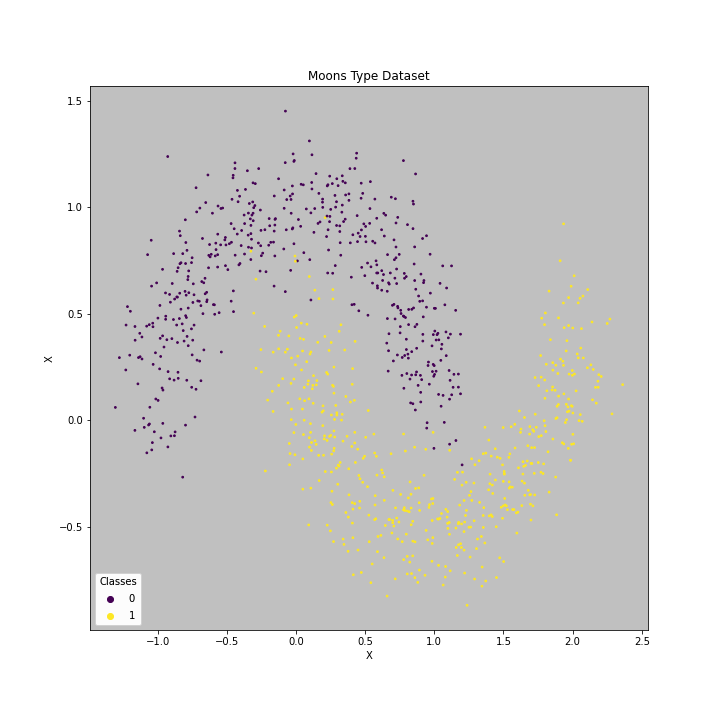

In [ ]:
xy,l = datasets.make_moons(
    n_samples=1000,
    noise=0.16
) # xy coordinates, and labels

fig, ax = plt.subplots(figsize=(10,10))
scatter = plt.scatter(xy[:,0],xy[:,1],3,l)

legend1 = ax.legend(
    *scatter.legend_elements(),
    loc="lower left", title="Classes")
ax.add_artist(legend1)

ax.set_title('Moons Type Dataset')
ax.set_xlabel('X')
ax.set_ylabel('X')
ax.set_facecolor('silver')

plt.show()

And now, let's see how the parameters change accuracy and error by using the single layer NN that we used before

TypeError: ignored

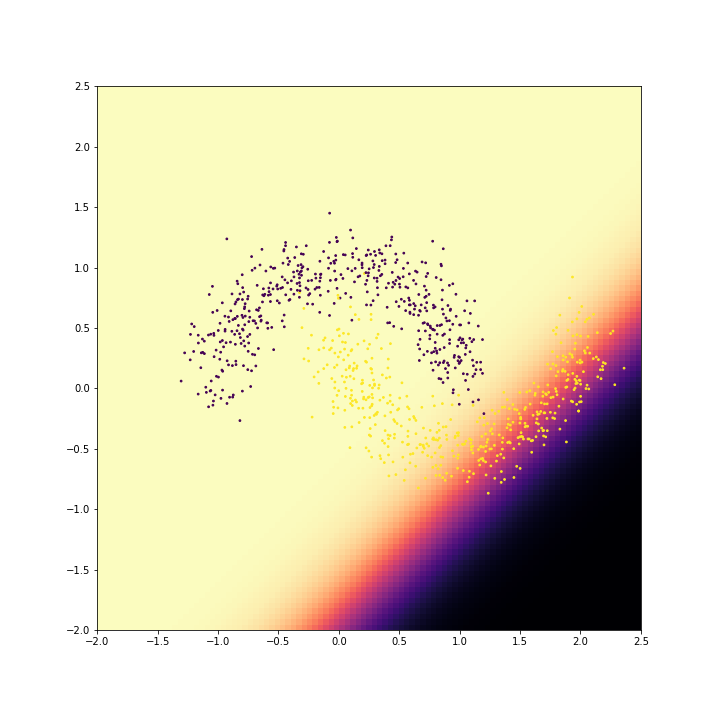

In [ ]:
def accuracy(p,t):
    return (p==t).sum()/len(p)
def mse(p,t):
    return ((p-t)**2).sum()/len(p)

def title_f(w1,w2,b):
    o = NN(xy[:,0],xy[:,1],w1,w2,b)
    acc = accuracy(o>=0.5, l==1)
    err = mse(o,l)
    return 'Accuracy: {acc:.2f}\nMSE: {err:.2f}'.format(acc=acc,err=err)

def NN(x,y,w1,w2,b):
    return 1/(1+np.exp(-(w1*x +w2*y) + b))

x = np.linspace(-2, 2.5, 101)
y = np.linspace(-2, 2.5, 101)
X,Y = np.meshgrid(x,y)
w1 = np.linspace(-4, 4, 101)
w2 = np.linspace(-4, 4, 101)
b = np.linspace(-10, 10, 101)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(xy[:,0],xy[:,1],3,l)
controls = iplt.imshow(lambda p1,p2,p3: NN(X,Y,p1,p2,p3), 
                       p1=w1, p2=w2, p3=b,
                       extent=[-2,2.5,-2,2.5],
                       autoscale_cmap=False,
                       cmap='magma',
                       **{'vmin':0, 'vmax':1}
                      )
ax.set_xlabel()
with controls:
    iplt.title(lambda p1,p2,p3: title_f(p1,p2,p3))

plt.show()

And now we'll look at how the error function looks like

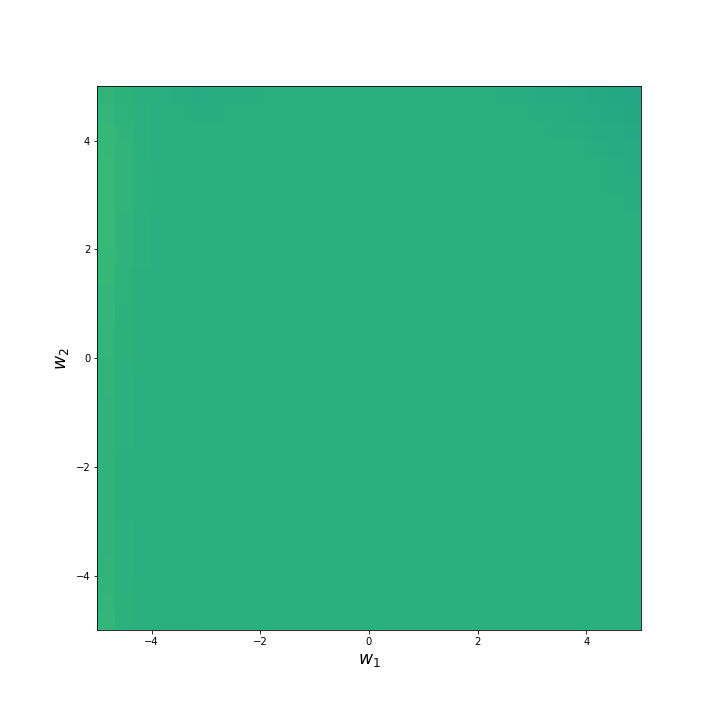

In [ ]:
w1 = np.linspace(-5,5,30)
w2 = np.linspace(-5,5,30)
b = np.linspace(-10,10,30)
W1,W2,B = np.meshgrid(w1,w2,b)
W1 = W1.reshape(30,30,30,1)
W2 = W2.reshape(30,30,30,1)
B = B.reshape(30,30,30,1)

temp = xy.reshape(1,1,1,-1,2)
O = 1/(1+np.exp(-(W1*temp[:,:,:,:,0]) - (W2*temp[:,:,:,:,1]) + B))

ll = ((0.8*l)+0.1).reshape(1,1,1,-1)
O = ((O-ll)**2).sum(axis=3) / 1000

b_dict = {v:i for i,v in enumerate(b)}
def get_plane(b):
    return O[:,:,b_dict[b]]
    
fig, ax = plt.subplots(figsize=(10,10))
controls = iplt.imshow(get_plane,
                       b=b,
                       autoscale_cmap=False,
                       extent=[w1[0],w1[-1],w2[0],w2[-1]],
                       play_buttons=True,
                       **{'vmin':O.min(), 'vmax':O.max()})
ax.set_xlabel('$w_1$', fontsize='xx-large')
ax.set_ylabel('$w_2$', fontsize='xx-large')
#iplt.plot(x, f2, controls=controls, label="f2")
plt.show()

# Gradient descend

Gradient descend is an optimization algorithm widely used in neural network training. Its basic idea is to descend function toward lower values by taking steps opposite to its derivative (gradient in multidimensional case). There are multiple variants of this algorithm, of which, some examples can be found below.

## Basic version

Basic version of gradient descend might easily get stuck in local minima. In the example below change the learning rate ALPHA and see what happens !

In [ ]:

ALPHA = 0.5 # CHANGE THIS !

#######

from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

def fx(x):
    return 3*(x**0.5) + np.sin(x)
def dfx(x):
    return (1.5/(x**0.5)) + np.cos(x)

def sgd(x,a,dfx):
    return x-(a*dfx(x))

fig, ax = plt.subplots(figsize=(19, 10)) # let's make it bigger
camera = Camera(fig)# the camera gets our figure

opti_x=np.zeros(40)
opti_x[0] = 8

for i in range(1,len(opti_x)):
    opti_x[i] = sgd(opti_x[i-1], ALPHA, dfx)
    
x = np.linspace(0.1,10,200)
y = fx(x)

plt.xlabel("Parameter")
plt.ylabel("Error")
for i in range(len(opti_x)):
  ax.plot(x,y,color="blue")
  ax.axvline(x=opti_x[0],color="red")
  ax.scatter(opti_x[0:i], fx(opti_x[0:i]), 100, 'r')
  camera.snap()


plt.close()

animation = camera.animate()
HTML(animation.to_html5_video())


## Stochastic gradient descent

Example below simulates the effect of subsampling in stochastic gradient descend. The main idea is that addition of noise helps get gradient descend unstuck. Play with learning rate ALPHA and the parameter RANDOMNESS which controls the amount of random noise.

In [ ]:
ALPHA = 0.5    # Change this
RANDOMNESS = 1 # Change this

#######

from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from numpy.random import normal

def fx(x):
    return 3*(x**0.5) + np.sin(x)
def dfx(x):
    return (1.5/(x**0.5)) + np.cos(x) + normal(0,RANDOMNESS)

def sgd(x,a,dfx):
    return x-(a*dfx(x))

fig, ax = plt.subplots(figsize=(19, 10)) # let's make it bigger
camera = Camera(fig)# the camera gets our figure


opti_x=np.zeros(40)
opti_x[0] = 7


for i in range(1,len(opti_x)):
    opti_x[i] = sgd(opti_x[i-1], ALPHA, dfx)

    
x = np.linspace(0.1,10,200)
y = fx(x)

plt.xlabel("Parameter")
plt.ylabel("Error")
for i in range(len(opti_x)):
  ax.plot(x,y,color="blue")
  ax.axvline(x=opti_x[0],color="red")
  ax.scatter(opti_x[0:i], fx(opti_x[0:i]), 100, 'r')
  camera.snap()


plt.close()

animation = camera.animate()
HTML(animation.to_html5_video())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


## Gradient descend with momentum

Gradient descend with momentum uses analogy of motion in physcis. In the example below play with parameters ALPHA (learning rate) and BETA. The parameter BETA controls how hard it is for the particle to change motion. In essence this corresponds to its mass.

In [ ]:
ALPHA = 0.5 #Change this !
BETA = 0.6  #Change this !
##############

from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

def fx(x):
    return 3*(x**0.5) + np.sin(x)
def dfx(x):
    return (1.5/(x**0.5)) + np.cos(x)
  

fig, ax = plt.subplots(figsize=(19, 10)) # let's make it bigger
camera = Camera(fig)# the camera gets our figure


opti_x=np.zeros(40)
opti_x[0] = 8

update = 0
for i in range(1,len(opti_x)):
    update = BETA*update - ALPHA*dfx(opti_x[i-1])
    opti_x[i] = opti_x[i-1] + update
    
x = np.linspace(0.1,10,200)
y = fx(x)

plt.xlabel("Parameter")
plt.ylabel("Error")
for i in range(len(opti_x)):
  ax.plot(x,y,color="blue")
  ax.axvline(x=opti_x[0],color="red")
  ax.scatter(opti_x[0:i], fx(opti_x[0:i]), 100, 'r')
  camera.snap()


plt.close()

animation = camera.animate()
HTML(animation.to_html5_video())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
